In [13]:
import numpy as np
import cv2
import pywt
import matplotlib.pyplot as plt
import os
import random
import pandas as pd

In [14]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [15]:
import os

def create_celebrity_paths_dict(celebrity_faces_dir="celebrity_faces_all"):
    """
    Create a dictionary mapping celebrity names to the lists of image paths.
    
    Returns:
        dict : {celebrity_name: [image_path1, image_path2, ...]}
    """
    
    celebrity_paths = {}
    
    if not os.path.exists(celebrity_faces_dir):
        print(f"Directory {celebrity_faces_dir} not found")
        return celebrity_paths
    
    # Iterate through celebrity folders
    for celebrity_folder in os.listdir(celebrity_faces_dir):
        celebrity_path = os.path.join(celebrity_faces_dir, celebrity_folder)
        
        if os.path.isdir(celebrity_path):
            # Get all image files in this celebrity's folder
            image_files = [f for f in os.listdir(celebrity_path)]
            
            # Create full paths for each image
            image_paths = [os.path.join(celebrity_path, img_file) for img_file in image_files]
            
            if image_paths:  # Only add if there are images
                celebrity_paths[celebrity_folder] = image_paths
    
    return celebrity_paths

# Create the dictionary
celebrity_paths_dict = create_celebrity_paths_dict()

# Display summary
print(f"Total celebrities: {len(celebrity_paths_dict)}")
print(f"Total images: {sum(len(paths) for paths in celebrity_paths_dict.values())}")

Total celebrities: 978
Total images: 14724


In [16]:
def w2d(img, mode='haar', level=1):
    """
    Use Wavelet Transform to extract features from the image
    Args:
        img: The input image
        mode: The wavelet mode (default is 'haar')
        level: The level of the wavelet transform (default is 1)
    Returns:
        imArray_H: The image with the high-frequency components
    """
    imArray = img
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0

    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)

    return imArray_H

    

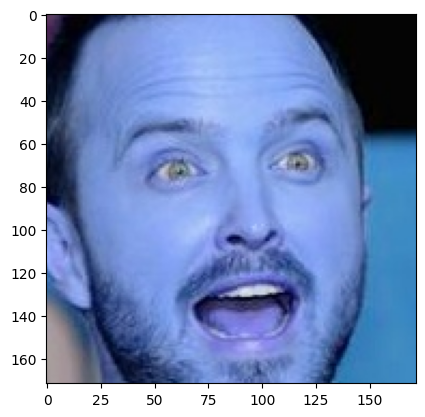

In [20]:
# Example usage:
# Load and display
img = cv2.imread(f"celebrity_faces_all\Aaron Paul\Aaron Paul_00000.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)

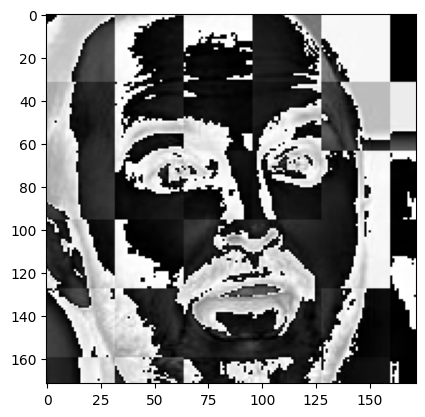

In [21]:
# Wavelet Transform
im_har = w2d(img_rgb,'db1',5)
plt.imshow(im_har, cmap='gray')

In [22]:
# Create a dictionary mapping celebrity names to their index
name_to_num = {name: i for i, name in enumerate(celebrity_paths_dict.keys())}

In [ ]:
x = []
y = []

# vertically stack the raw image and the wavelet transformed image
for celebrity_name, training_files in celebrity_paths_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        combined_image = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))
        x.append(combined_image)
        y.append(name_to_num[celebrity_name])


In [ ]:
# Convert list of arrays to one big array
X = np.array(x)
y = np.array(y)
print(f" Shape of X: {X.shape}, Shape of y: {y.shape}")

# Save compressed file
np.savez_compressed("celebrity_features.npz", X=X, y=y)

 Shape of X: (14724, 4096, 1), Shape of y: (14724,)
